# YouTube Video Recommendation System Using BERT Embeddings
This project builds a content-based video recommendation system for YouTube trending videos using semantic similarity of video titles. It leverages the pre-trained BERT language model to generate dense vector embeddings of video titles and uses cosine similarity to recommend videos with similar content.∇

prediction of modle: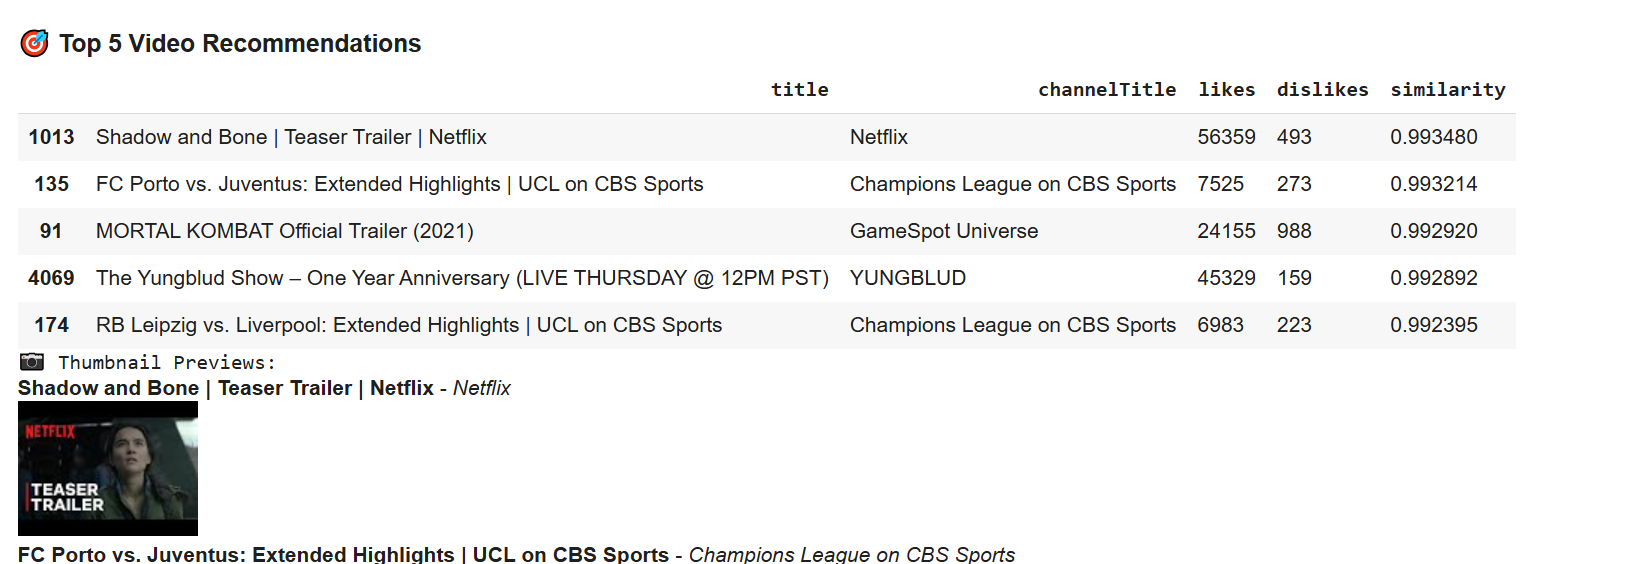
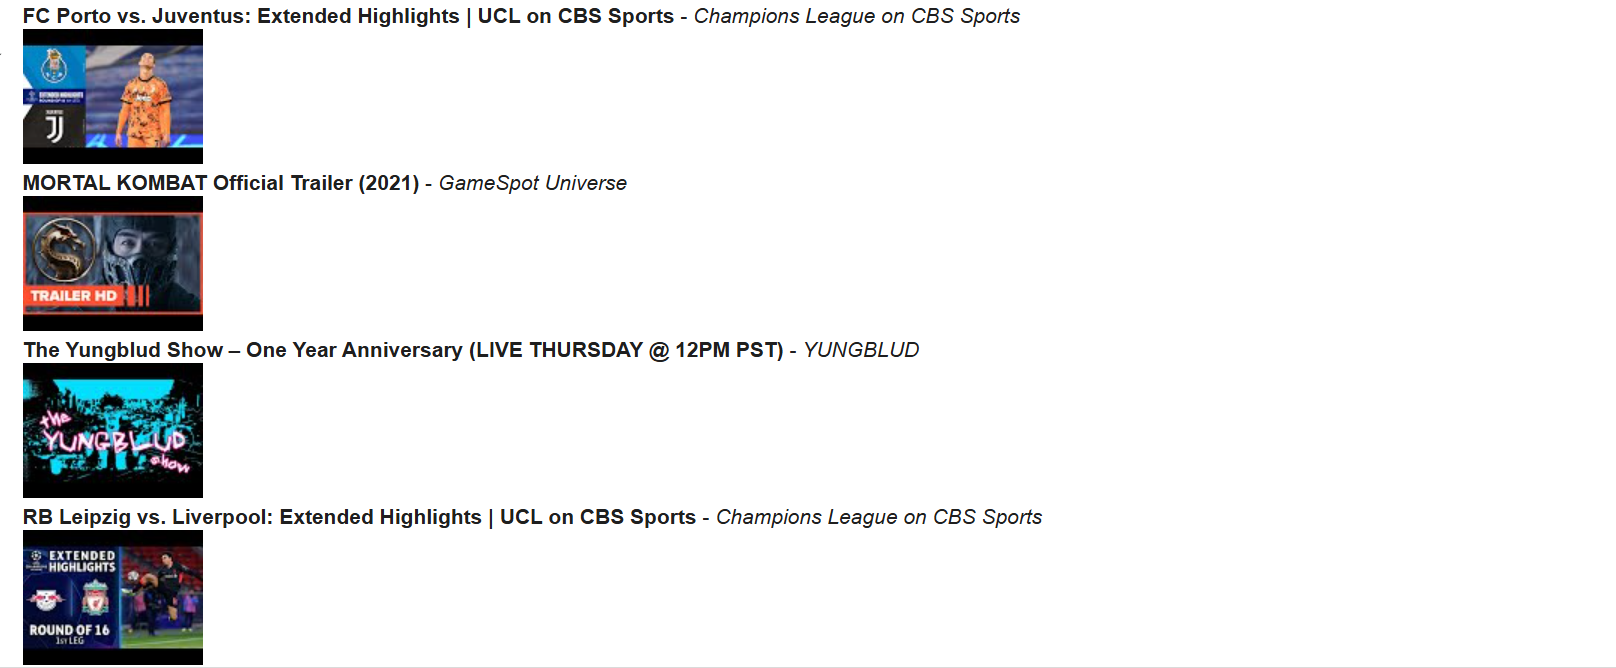

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunnywazir","key":"51bbd8cffc1379c0e014c50ca5a4fd25"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d jyotmakadiya/top-trending-videos-youtube-2021


Dataset URL: https://www.kaggle.com/datasets/jyotmakadiya/top-trending-videos-youtube-2021
License(s): CC0-1.0
  0% 0.00/39.0M [00:00<?, ?B/s]
100% 39.0M/39.0M [00:00<00:00, 977MB/s]


In [ ]:
!unzip top-trending-videos-youtube-2021.zip


Archive:  top-trending-videos-youtube-2021.zip
  inflating: BR_videos_data.csv      
  inflating: CA_videos_data.csv      
  inflating: DE_videos_data.csv      
  inflating: FR_videos_data.csv      
  inflating: GB_videos_data.csv      
  inflating: IN_videos_data.csv      
  inflating: JP_videos_data.csv      
  inflating: KR_videos_data.csv      
  inflating: MX_videos_data.csv      
  inflating: RU_videos_data.csv      
  inflating: US_videos_data.csv      


In [ ]:
import re
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('US_videos_data.csv')


In [ ]:
df.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,0,IhO1FcjDMV4,Meatpacking: Last Week Tonight with John Olive...,2021-02-22T07:30:01Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,21.22.02,[none],1067147,60111,1221,6866,https://i.ytimg.com/vi/IhO1FcjDMV4/default.jpg,False,False,The pandemic has thrown into high relief some ...
1,1,p4Wy84AOzj0,"Best 3D Pen Art Wins $5,000 Challenge! | ZHC C...",2021-02-21T20:43:28Z,UCPAk4rqVIwg1NCXh61VJxbg,ZHC Crafts,26,21.22.02,[none],1047854,50662,690,4879,https://i.ytimg.com/vi/p4Wy84AOzj0/default.jpg,False,False,I can't believe we made art using 3d pens and ...
2,2,4eKXwKDdXYA,100 Days - [Minecraft Superflat],2021-02-20T18:00:01Z,UC9FkeEFIGd9FXRfxpTltXYA,Luke TheNotable,20,21.22.02,luke thenotable|luke|the|notable|luke thenotab...,6133266,372753,7961,39551,https://i.ytimg.com/vi/4eKXwKDdXYA/default.jpg,False,False,This video is intended for audiences 13+ years...
3,3,XHR5mt2gBjo,Amazing! Luke Bryan Calls 15-Year-Old Casey Bi...,2021-02-22T01:53:12Z,UCAMPco9PqjBbI_MLsDOO4Jw,American Idol,24,21.22.02,American Idol|singing competition|Katy Perry|R...,790238,14267,129,1257,https://i.ytimg.com/vi/XHR5mt2gBjo/default.jpg,False,False,Small but MIGHTY! Casey Bishop completely blow...
4,4,C-icyHEb7W4,Game Theory: Did Reddit Just SOLVE FNAF?,2021-02-20T19:05:26Z,UCo_IB5145EVNcf8hw1Kku7w,The Game Theorists,20,21.22.02,fnaf|five nights at freddy's|fnaf 4|fnaf theor...,3248661,225780,2872,31885,https://i.ytimg.com/vi/C-icyHEb7W4/default.jpg,False,False,Get Yourself Some BRAND NEW Theory Wear! ► htt...


In [ ]:
# Select important columns
df = df[['title', 'channelTitle', 'likes', 'dislikes', 'thumbnail_link', 'description']]

In [ ]:
df.head()

,title,channelTitle,likes,dislikes,thumbnail_link,description
0,Meatpacking: Last Week Tonight with John Olive...,LastWeekTonight,60111,1221,https://i.ytimg.com/vi/IhO1FcjDMV4/default.jpg,The pandemic has thrown into high relief some ...
1,"Best 3D Pen Art Wins $5,000 Challenge! | ZHC C...",ZHC Crafts,50662,690,https://i.ytimg.com/vi/p4Wy84AOzj0/default.jpg,I can't believe we made art using 3d pens and ...
2,100 Days - [Minecraft Superflat],Luke TheNotable,372753,7961,https://i.ytimg.com/vi/4eKXwKDdXYA/default.jpg,This video is intended for audiences 13+ years...
3,Amazing! Luke Bryan Calls 15-Year-Old Casey Bi...,American Idol,14267,129,https://i.ytimg.com/vi/XHR5mt2gBjo/default.jpg,Small but MIGHTY! Casey Bishop completely blow...
4,Game Theory: Did Reddit Just SOLVE FNAF?,The Game Theorists,225780,2872,https://i.ytimg.com/vi/C-icyHEb7W4/default.jpg,Get Yourself Some BRAND NEW Theory Wear! ► htt...


In [ ]:
df.tail()

,title,channelTitle,likes,dislikes,thumbnail_link,description
5995,Our New Channel!,SML,43466,539,https://i.ytimg.com/vi/L5bIL0YKHR0/default.jpg,This is the new SML channel! Subscribe!Go subs...
5996,I Cooked a Chicken by Slapping It,Louis Weisz,396300,12706,https://i.ytimg.com/vi/LHFhnnTWMgI/default.jpg,Use code WEISZ12 to get up to 12 FREE MEALS ac...
5997,"Offering People $100,000 To Quit Their Job",MrBeast,1674636,22478,https://i.ytimg.com/vi/DuQbOQwVaNE/default.jpg,Download Finger On The App 2 NOW! - https://be...
5998,Dark Alliance – Official Gameplay Trailer,Dark Alliance,2358,434,https://i.ytimg.com/vi/TC1smbjIVJI/default.jpg,Your Party. Their Funeral. Preorder Now – Dark...
5999,Shrek: Fairy Tale Freakdown (GBC) - Angry Vide...,Cinemassacre,58856,3701,https://i.ytimg.com/vi/ZJAKd4hg_m0/default.jpg,Go to http://buyraycon.com/cinemassacre for 15...


In [ ]:
df.shape

(6000, 6)

In [ ]:
df.isnull().sum()

,0
title,0
channelTitle,0
likes,0
dislikes,0
thumbnail_link,0
description,15


In [ ]:
df.duplicated().sum()

np.int64(18)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Function to clean titles (remove special characters)
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())

df['clean_title'] = df['title'].apply(clean_text)


In [ ]:
df.head()

,title,channelTitle,likes,dislikes,thumbnail_link,description,clean_title
0,Meatpacking: Last Week Tonight with John Olive...,LastWeekTonight,60111,1221,https://i.ytimg.com/vi/IhO1FcjDMV4/default.jpg,The pandemic has thrown into high relief some ...,meatpacking last week tonight with john oliver...
1,"Best 3D Pen Art Wins $5,000 Challenge! | ZHC C...",ZHC Crafts,50662,690,https://i.ytimg.com/vi/p4Wy84AOzj0/default.jpg,I can't believe we made art using 3d pens and ...,best 3d pen art wins 5000 challenge zhc crafts
2,100 Days - [Minecraft Superflat],Luke TheNotable,372753,7961,https://i.ytimg.com/vi/4eKXwKDdXYA/default.jpg,This video is intended for audiences 13+ years...,100 days minecraft superflat
3,Amazing! Luke Bryan Calls 15-Year-Old Casey Bi...,American Idol,14267,129,https://i.ytimg.com/vi/XHR5mt2gBjo/default.jpg,Small but MIGHTY! Casey Bishop completely blow...,amazing luke bryan calls 15yearold casey bisho...
4,Game Theory: Did Reddit Just SOLVE FNAF?,The Game Theorists,225780,2872,https://i.ytimg.com/vi/C-icyHEb7W4/default.jpg,Get Yourself Some BRAND NEW Theory Wear! ► htt...,game theory did reddit just solve fnaf


In [ ]:
df['clean_title'].value_counts()


,count
clean_title,
were having a baby,14
goodbye,11
nf lost ft hopsin,10
whoever can survive the most days on a deserted island in minecraft wins,10
minecraft survivor vs 3 hitmen,10
...,...
zack snyders justice league making the snyder cut hbo max,1
olympique lyonnais paris saintgermain 2 4 highlights ol psg 20202021,1
leicester city v manchester united key moments quarterfinal emirates fa cup 202021,1


In [ ]:
df = df.drop_duplicates(subset='clean_title')

In [ ]:
df['clean_title'].value_counts()


,count
clean_title,
state of emergency declared in miami beach amid spring break partying,1
meatpacking last week tonight with john oliver hbo,1
best 3d pen art wins 5000 challenge zhc crafts,1
100 days minecraft superflat,1
amazing luke bryan calls 15yearold casey bishop a massive star american idol 2021,1
...,...
1000 if you can break this ball in 1 minute,1
wandavision episode 7 breakdown easter eggs details you missed 1x07 breaking the fourth wall,1
i want to live in a skyrim house,1


In [ ]:
# Load pre-trained BERT tokenizer and model from Hugging Face
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  1


In [ ]:
def get_bert_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size].tolist()
        inputs = tokenizer(batch_texts, return_tensors="tf", padding=True, truncation=True, max_length=512)

        with tf.device('/GPU:0'):
            outputs = model(inputs)
            embeddings = outputs.pooler_output.numpy()
            all_embeddings.extend(embeddings)
    return all_embeddings

df['embedding'] = get_bert_embeddings(df['clean_title'])


In [ ]:
import pickle

# Save using pandas
df.to_pickle("youtube_with_embeddings.pkl")

In [ ]:
df = pd.read_pickle("youtube_with_embeddings.pkl")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# For the input query
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=512)
    with tf.device('/GPU:0'):
        outputs = model(inputs)
        return outputs.pooler_output[0].numpy()

# Recommendation function
def recommend_videos(input_title, df, top_n=5):
    cleaned_input = clean_text(input_title)
    input_embedding = get_bert_embedding(cleaned_input)

    # 🔽 Reuse precomputed embeddings here
    similarities = df['embedding'].apply(lambda x: cosine_similarity([input_embedding], [x])[0][0])
    df['similarity'] = similarities

    recommendations = df[df['title'] != input_title].sort_values(by='similarity', ascending=False).head(top_n)
    return recommendations[['title', 'channelTitle', 'likes', 'dislikes', 'thumbnail_link', 'similarity']]


In [ ]:
from IPython.display import Image, display, HTML

your_title = "Speak english fluently"
recommendations = recommend_videos(your_title, df, top_n=5)

# Pretty Table Output
display(HTML("<h3>🎯 Top 5 Video Recommendations</h3>"))
display(recommendations.drop(columns=['thumbnail_link']).style.set_properties(**{'text-align': 'left'}))

# Show Thumbnails
print("📷 Thumbnail Previews:")
for i, row in recommendations.iterrows():
    display(HTML(f"<b>{row['title']}</b> - <i>{row['channelTitle']}</i><br>"))
    display(Image(url=row['thumbnail_link']))


,title,channelTitle,likes,dislikes,similarity
1013,Shadow and Bone | Teaser Trailer | Netflix,Netflix,56359,493,0.993480
135,FC Porto vs. Juventus: Extended Highlights | UCL on CBS Sports,Champions League on CBS Sports,7525,273,0.993214
91,MORTAL KOMBAT Official Trailer (2021),GameSpot Universe,24155,988,0.992920
4069,The Yungblud Show – One Year Anniversary (LIVE THURSDAY @ 12PM PST),YUNGBLUD,45329,159,0.992892
174,RB Leipzig vs. Liverpool: Extended Highlights | UCL on CBS Sports,Champions League on CBS Sports,6983,223,0.992395


📷 Thumbnail Previews:
